## Kernel classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, Y = dataset['X'], dataset['y']
n, p = np.shape(X)
X = np.hstack((np.ones((n,1)), X))  # append a column of ones
n, p = np.shape(X)

sigma_arr = np.linspace(0.1,30,300)
lam = 0.5

In [3]:
error_rates = [] # for plot

# Calculate kernel value
distsq=np.zeros((n,n),dtype=float)
for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
for sigma in sigma_arr: 
    K = np.exp(-distsq/(2*sigma**2))
    alpha = np.linalg.inv(K+lam*np.identity(n))@Y

    # Predict labels 
    Yhat = K@alpha
    error = np.mean(np.sign(Yhat)!=Y)
    error_rates = np.concatenate((error_rates, [error]))

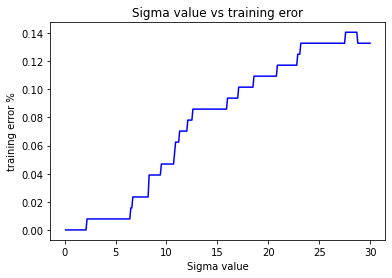

Small sigma values (0.1-2.2 on average) can achieve 0% training error, while larger sigma values lead to an 
increase in training error. This is because a larger sigma smoothens the curve and focuses more on dominant features, which means the error between the predicted label and the average data label increases.


In [4]:
plt.plot(sigma_arr, error_rates, 'b-')
plt.title('Sigma value vs training eror')
plt.xlabel('Sigma value')
plt.ylabel('training error %')
plt.show()

print('Small sigma values (0.1-2.2 on average) can achieve 0% training error, while larger sigma values lead to an ')
print('increase in training error. This is because a larger sigma smoothens the curve and focuses more on dominant features, which means the error between the predicted label and the average data label increases.')

In [4]:
## Setup for CV - create 8 sets and each set is the holdout set in one case
setindices = [[0,16],[16,32],[32,48],[48,64],[64,80],[80,96],[96,112],[112,128]]
cases = len(setindices) # 8
cv_error_rates = [] # for plot

for  sigma in sigma_arr:
    error_rates = [] # for plot
    for z in range(cases):   
        val_ind = np.arange(setindices[[z][0]][0], setindices[[z][0]][1]) # indices for validation set
        train_ind = list(set(range(128))-set(val_ind)) # training set indices
    
        # matrix of features and labels corresponding to validation set
        Xval = X[val_ind,:]
        Yval = Y[val_ind]
    
        # matrix of features and labels corresponding to the training set
        Xt = X[train_ind,:]
        Yt = Y[train_ind]
        m, k  = np.shape(Xt)

        # Calculate kernel value from training set
        distsq=np.zeros((m,m),dtype=float)
        for i in range(m):
            for j in range(m):
                d = np.linalg.norm(Xt[i,:]-Xt[j,:])
                distsq[i,j]=d**2
        K = np.exp(-distsq/(2*sigma**2))
        
        # Calculate weights from training set
        alpha = np.linalg.inv(K+lam*np.identity(m))@Yt

        # Calculate kernel value from testing set
        newdistsq=np.zeros((n-m,m),dtype=float)
        for i in range(n-m):
            for j in range(m):
                d = np.linalg.norm(Xval[i,:]-Xt[j,:])
                newdistsq[i,j]=d**2
        newK = np.exp(-newdistsq/(2*sigma**2))
    
        Yhat = newK@alpha

        error = np.mean(np.sign(Yhat)!=Yval)
        error_rates = np.concatenate((error_rates, [error]))
    cv_error_rates = np.concatenate((cv_error_rates, [np.mean(error_rates)]))

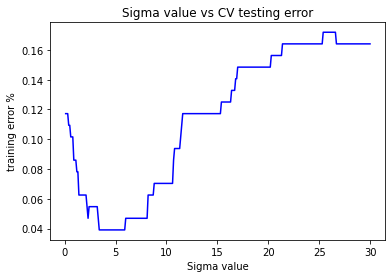

Average cross validation error: 0.11518229166666667 (perfect test accuracy cannot be achieved)


In [12]:
# Plot
plt.plot(sigma_arr, cv_error_rates, 'b-')
plt.title('Sigma value vs CV testing error')
plt.xlabel('Sigma value')
plt.ylabel('training error %')
plt.show()
print('Average cross validation error:', np.mean(cv_error_rates),'(perfect test accuracy cannot be achieved)')